In [1]:
# Project: Medical Insurance Costs Analysis
# Author: Spencer Wilkins
# Date: October 2025
# Overview:
""" This portfolio project analyzes a medical insurance costs dataset to uncover insights into factors influencing individual medical charges. 
Using Python and the Pandas library, I explore relationships between variables such as age, BMI, smoking status, and region to understand their 
impact on insurance costs. The project demonstrates my ability to perform independent data analysis, apply Python programming skills, and derive 
meaningful conclusions from real-world data. """

#Dataset: Kaggle (https://www.kaggle.com/datasets/mirichoi0218/insurance)


' This portfolio project analyzes a medical insurance costs dataset to uncover insights into factors influencing individual medical charges. \nUsing Python and the Pandas library, I explore relationships between variables such as age, BMI, smoking status, and region to understand their \nimpact on insurance costs. The project demonstrates my ability to perform independent data analysis, apply Python programming skills, and derive \nmeaningful conclusions from real-world data. '

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [3]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe() #basic stats across the dataset of insurance.csv

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
smokers = df[df['smoker'] == 'yes']
nonsmokers = df[df['smoker'] == 'no']
avg_smokers = smokers['charges'].mean() 
avg_nonsmokers = nonsmokers['charges'].mean()
print("avg cost [smokers]: " + str(avg_smokers.round(2)) + '\n' "avg cost [non-smokers]: " + str(avg_nonsmokers) + "\n")
parents = df[df['children'] > 0]
non_parents = df[df['children'] == 0]
avg_parents = parents['charges'].mean()
avg_non_parents = non_parents['charges'].mean()
print("avg cost [parents]: " + str(avg_parents.round(2)) + '\n' "avg cost [non-parents]: " + str(avg_non_parents.round(2)) )

avg cost [smokers]: 32050.23
avg cost [non-smokers]: 8434.268297856204

avg cost [parents]: 13949.94
avg cost [non-parents]: 12365.98


In [6]:
region_group = df.groupby(by='region')
region_group['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

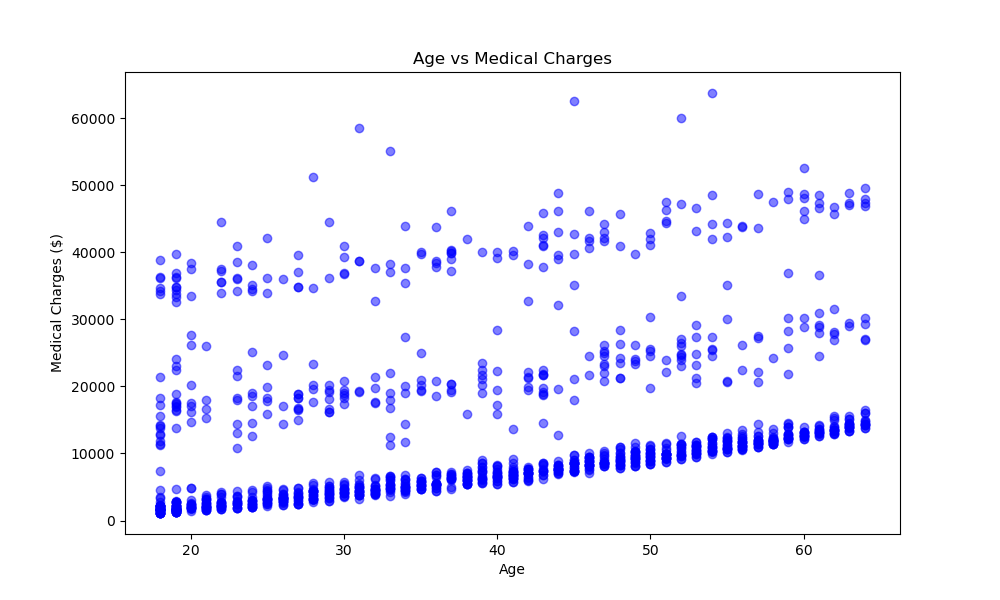

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['charges'], color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Medical Charges ($)')
plt.title('Age vs Medical Charges')
plt.show()

In [8]:
plt.close()
print(df['age'].corr(df['charges'])) #Age correlation coefficient to charges.
"""First observation:
Figure 1 appears to show that most individuals as they age seem to have a steady increase in insurance cost. 
However, there are two additional cohorts that have much higher charges and also increase steadily with age. I think what this data suggests, is that
although age is a primary factor in insurance costs, it is not a significant driver of raised insurance charges. Age is likely used as a baseline to
determine costs when other influencing factors are at play. 
"""


0.29900819333064754


'First observation:\nFigure 1 appears to show that most individuals as they age seem to have a steady increase in insurance cost. \nHowever, there are two additional cohorts that have much higher charges and also increase steadily with age. I think what this data suggests, is that\nalthough age is a primary factor in insurance costs, it is not a significant driver of raised insurance charges. Age is likely used as a baseline to\ndetermine costs when other influencing factors are at play. \n'

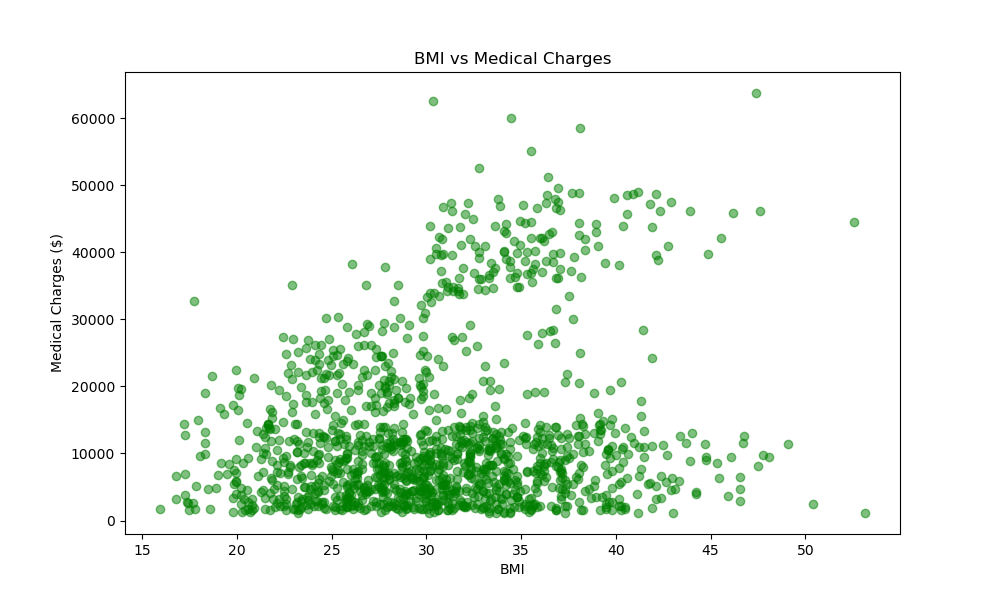

In [9]:
"""Next assumption:
I believe BMI will play a key role in higher charges. The higher charged cohorts should be distincly viewable in a scatterplot comparing BMI to charges. 

"""

plt.figure(figsize=(10, 6)) 
plt.scatter(df['bmi'], df['charges'],color='green', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Medical Charges ($)')
plt.title('BMI vs Medical Charges')
plt.show()

In [10]:
plt.close()
print(df['bmi'].corr(df['charges']))

0.19834096883362884


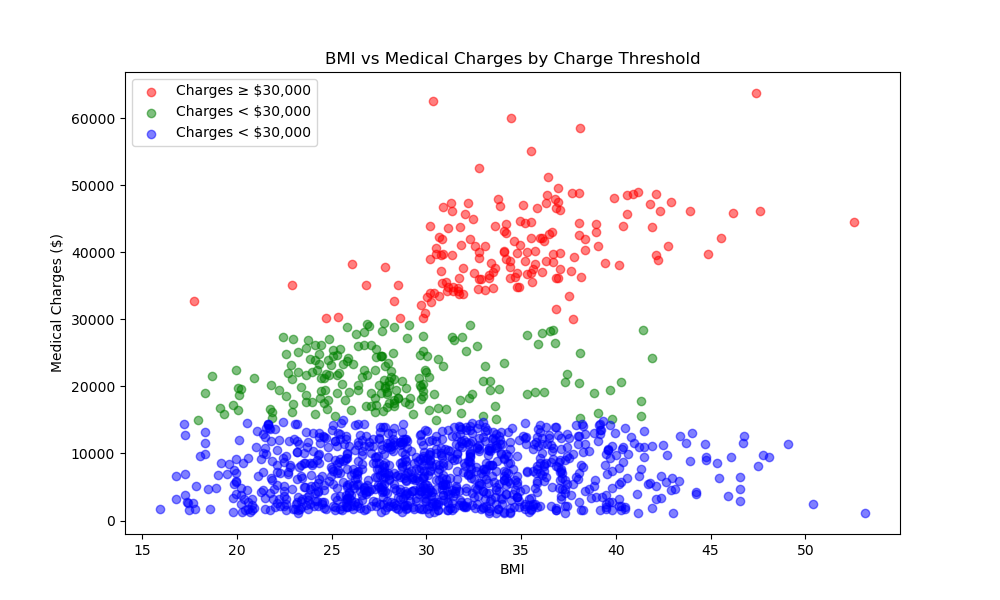

In [11]:
"""
Observation: 
### Figure 2: BMI vs. Medical Charges
The scatter plot of BMI vs. Medical Charges shows a less defined pattern than age, with a correlation coefficient of 0.20 indicating a 
weak positive relationship. Three loose clusters emerge: a dense group with charges mostly below $15,000, and two sparser groups. 
One group between $15k - $30k. With another group getting charged up to ~$60k. The stable bottom group, particularly for BMI > 35 
suggests BMI alone is not a primary driver of high insurance costs, as charges remain stable (~$10,000–$12,000) even for higher outlier BMIs. 

I believe this indicates other factors playing a more significant role in elevated costs, with BMI as a secondary indicator. 

To continue testing, I visually separated this data into three relatively distinct cohorts below. 
"""

plt.figure(figsize=(10, 6))  # Set figure size for clarity
plt.scatter(df[df['charges'] >= 30000]['bmi'], df[df['charges'] >= 30000]['charges'], 
            color='red', alpha=0.5, label='Charges ≥ $30,000')
plt.scatter(df[(df['charges'] >= 15000 ) & (df['charges'] < 30000)]['bmi'], df[(df['charges'] >= 15000 ) & (df['charges'] < 30000)]['charges'], 
            color='green', alpha=0.5, label='Charges < $30,000')
plt.scatter(df[df['charges'] < 15000]['bmi'], df[df['charges'] < 15000]['charges'], 
            color='blue', alpha=0.5, label='Charges < $30,000')
plt.xlabel('BMI')
plt.ylabel('Medical Charges ($)')
plt.title('BMI vs Medical Charges by Charge Threshold')
plt.legend()
plt.show()

In [12]:
plt.close()

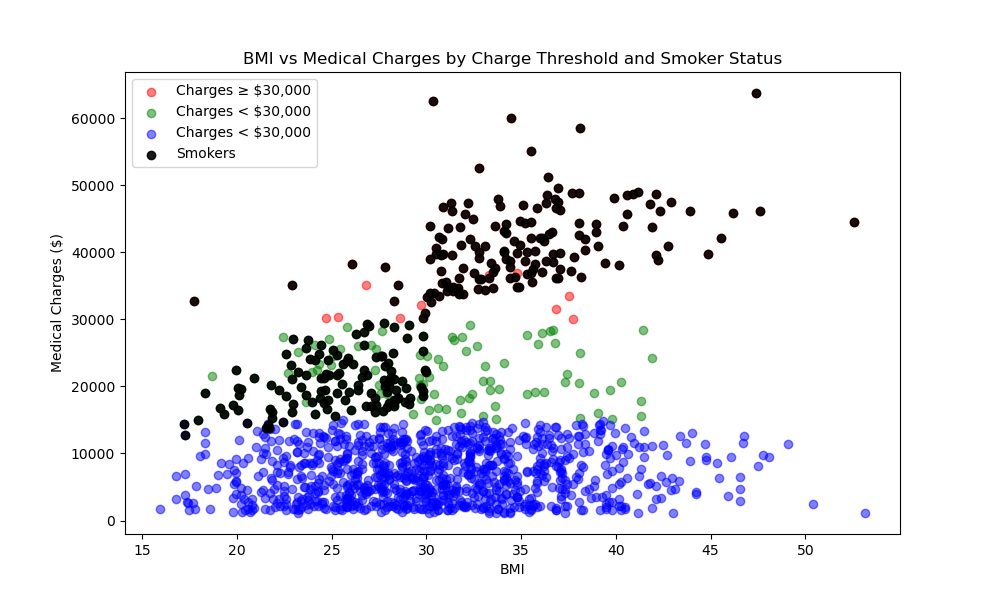

In [13]:
"""
Figure 9 observations and assumptions:
Now that recipients are highlighted for BMI vs Medical charges and visually grouped by charge thresholds; it should be possible to test 
potentially more exigent coinciding factors that influence insurance charges. 

Smokers can be highlighted next. 
"""

plt.figure(figsize=(10, 6))
plt.scatter(df[df['charges'] >= 30000]['bmi'], df[df['charges'] >= 30000]['charges'], 
            color='red', alpha=0.5, label='Charges ≥ $30,000')
plt.scatter(df[(df['charges'] >= 15000 ) & (df['charges'] < 30000)]['bmi'], df[(df['charges'] >= 15000 ) & (df['charges'] < 30000)]['charges'], 
            color='green', alpha=0.5, label='Charges < $30,000')
plt.scatter(df[df['charges'] < 15000]['bmi'], df[df['charges'] < 15000]['charges'], 
            color='blue', alpha=0.5, label='Charges < $30,000')
plt.scatter(df[(df['smoker'] == 'yes') & (df['charges'] > 0)]['bmi'], 
            df[(df['smoker'] == 'yes') & (df['charges'] > 0)]['charges'], 
            color='black', alpha=0.9, label= 'Smokers')
plt.xlabel('BMI')
plt.ylabel('Medical Charges ($)')
plt.title('BMI vs Medical Charges by Charge Threshold and Smoker Status')
plt.legend()
plt.show()

In [14]:
plt.close()

"""
Observations:
### Figure 9: BMI vs. Medical Charges by Charge Threshold and Smoker Status

The scatter plot highlights BMI vs. medical charges, segmented into three charge thresholds (< $15,000, $15,000–$30,000, ≥ $30,000) with 
smokers overlaid. Smokers exclusively appear in cohorts with charges above $10,000, with a concentration in the $30,000+ group. 
Individuals with BMI > 30 who smoke have significantly higher charges (up to ~$60,000), I interpret a strong interaction between smoking and 
high BMI as a key driver of elevated insurance costs. This reinforces that while BMI alone is a weak predictor (correlation 0.20), its combination 
with smoking amplifies costs.
"""

'\nObservations:\n### Figure 9: BMI vs. Medical Charges by Charge Threshold and Smoker Status\n\nThe scatter plot highlights BMI vs. medical charges, segmented into three charge thresholds (< $15,000, $15,000–$30,000, ≥ $30,000) with \nsmokers overlaid. Smokers exclusively appear in cohorts with charges above $10,000, with a concentration in the $30,000+ group. \nIndividuals with BMI > 30 who smoke have significantly higher charges (up to ~$60,000), I interpret a strong interaction between smoking and \nhigh BMI as a key driver of elevated insurance costs. This reinforces that while BMI alone is a weak predictor (correlation 0.20), its combination \nwith smoking amplifies costs.\n'

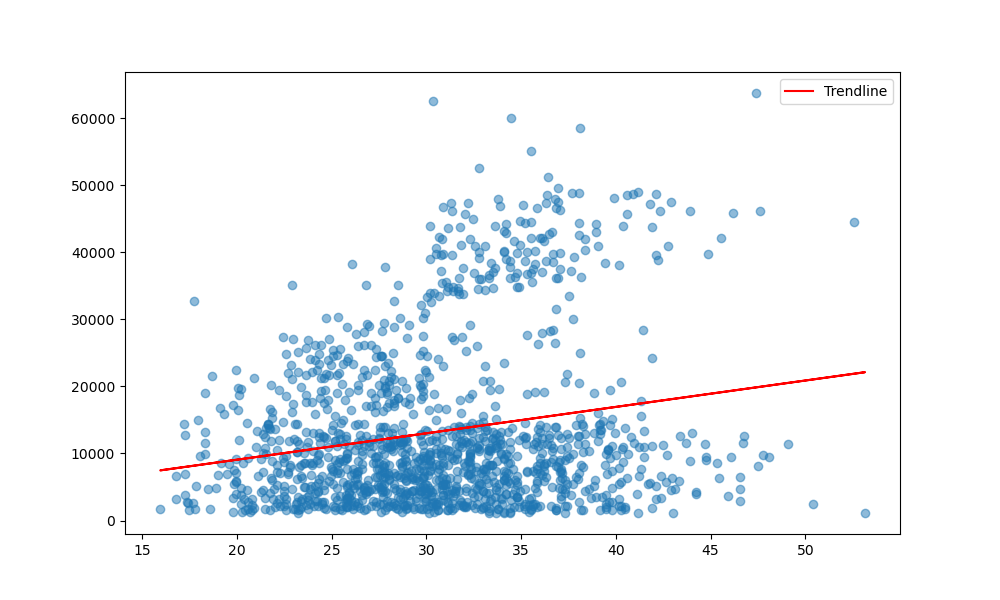

In [15]:
"""
Up to now, I had not yet learned how to make a line of best fit using pandas or Matplotlib. Using AI for help in this course has not been discouraged.
So I had CoPilot create a simple example below as a function. The figure below is just an example. But the next figure I'll try to find a best fit line
that provides some real insight into the data. 
"""

def bestfitline(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color='red', label='Trendline')
    plt.legend()
    plt.show()

bestfitline(df['bmi'], df['charges'])

In [16]:
plt.close()

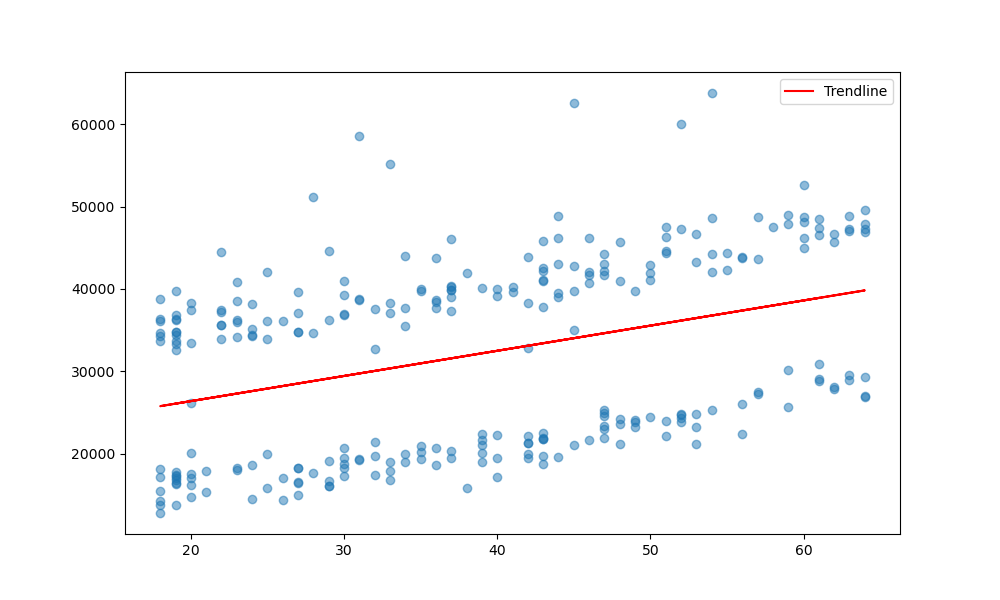

In [17]:
"""To start making use of this function I felt it was a good idea to get an idea of charge increases over age,
and get a trendline to see the visual trajectory. The below is Age vs Charges for smokers.
"""
bestfitline(df[df['smoker'] == 'yes']['age'], df[df['smoker'] == 'yes']['charges'])
#25,800 to $40,000

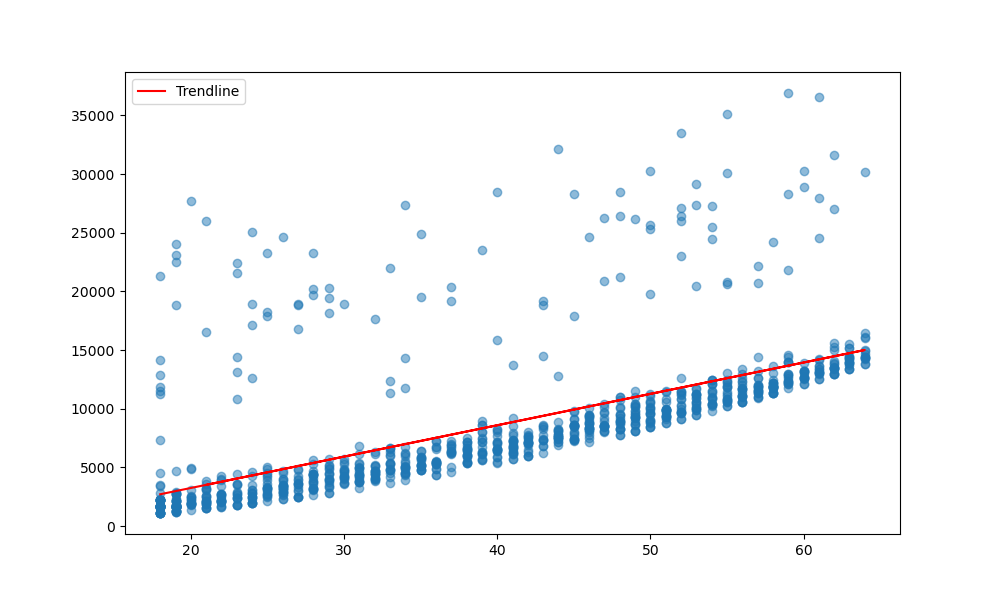

In [18]:
"""
The trendline below is Age vs Charges for non smokers. But there is no stark difference in the angle of the trendline. 

The question I want to answer is "How strongly does age predict medical charges for non-smokers, and what is the rate of cost increase per year?".
"""

bestfitline(df[df['smoker'] == 'no']['age'], df[df['smoker'] == 'no']['charges'])


In [19]:
"""
To get a true, concrete answer on the above insight, determining the slope for each cohort will tell us the actual rate of 
insurance charge increases over time. 
"""

m_smoker, b_smoker = np.polyfit(df[df['smoker'] == 'yes']['age'], df[df['smoker'] == 'yes']['charges'], 1)
m_nonsmoker, b_nonsmoker = np.polyfit(df[df['smoker'] == 'no']['age'], df[df['smoker'] == 'no']['charges'], 1)

print(f"Slope for smokers: {m_smoker}")
print(f"Slope for non-smokers: {m_nonsmoker}")

Slope for smokers: 305.2376021098291
Slope for non-smokers: 267.2489128311997
